In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mlxtend
print(mlxtend.__version__)
import zipfile

0.14.0


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
width_shape = 224
height_shape = 224
batch_size = 32 

names = ['clase1','clase2', 'clase3']

In [ ]:
width_shape = 224
height_shape = 224
batch_size = 32 

names = ['Rural','Urbano']

In [ ]:
#zip_ref = zipfile.ZipFile("/content/drive/Shareddrives/PovertyModels/data/La_Paz.zip", 'r')
#zip_ref = zipfile.ZipFile("/content/drive/Shareddrives/PovertyModels/data/dataset10.zip", 'r')
#zip_ref = zipfile.ZipFile("/content/drive/Shareddrives/PovertyModels/data/Dataset6.zip", 'r')
zip_ref = zipfile.ZipFile("/content/drive/Shareddrives/PovertyModels/data/Data_Rural_vs_Urbano2.zip", 'r')

#zip_ref = zipfile.ZipFile("/content/drive/Shareddrives/PovertyModels/data/Oruro1.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
test_data_dir = '/tmp/Data_Rural_vs_Urbano2/Dev/'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)


#custom_Model= load_model('/content/drive/Shareddrives/PovertyModels/Modelos/modeloFTL_Rnet.h5')
custom_Model = load_model('/content/drive/Shareddrives/PovertyModels/Modelos/modelRvU_Resnet.h5')

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

Found 110 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

[[60  1]
 [ 8 41]]


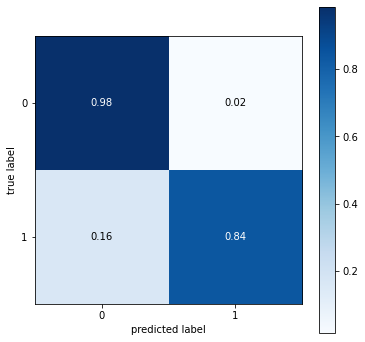

In [ ]:
matc2=confusion_matrix(y_real, y_pred,)
print(matc2)
plot_confusion_matrix(conf_mat=matc2, figsize=(6,6), colorbar= True, show_absolute=False, show_normed=True)
#plot_confusion_matrix(conf_mat=matc, figsize=(6,6), class_names = names, show_normed=False)
plt.show()
#plt.tight_layout()

In [ ]:
print(metrics.classification_report(y_pred,y_real, digits = 4))

              precision    recall  f1-score   support

           0     0.8140    0.7572    0.7846       416
           1     0.2300    0.9485    0.3702        97
           2     0.9725    0.5772    0.7244       674

    accuracy                         0.6706      1187
   macro avg     0.6722    0.7609    0.6264      1187
weighted avg     0.8563    0.6706    0.7165      1187

